In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u

from gammapy.data import DataStore

In [2]:
data_store = DataStore.from_dir("$GAMMAPY_DATA/hess-dl3-dr1")

data_store.info()

Data store:
HDU index table:
BASE_DIR: /Users/mregeard/Workspace/data/gammapy-data/gammapy-datasets/1.3/hess-dl3-dr1
Rows: 630
OBS_ID: 20136 -- 47829
HDU_TYPE: [np.str_('aeff'), np.str_('bkg'), np.str_('edisp'), np.str_('events'), np.str_('gti'), np.str_('psf')]
HDU_CLASS: [np.str_('aeff_2d'), np.str_('bkg_3d'), np.str_('edisp_2d'), np.str_('events'), np.str_('gti'), np.str_('psf_table')]


Observation table:
Observatory name: 'N/A'
Number of observations: 105



`DataStore` contains two tables. The main one is the HDU table. It contains the adresses of all elements contained in all observations.

In [3]:
data_store.hdu_table[:10]

OBS_ID,HDU_TYPE,HDU_CLASS,FILE_DIR,FILE_NAME,HDU_NAME,SIZE
int64,bytes6,bytes9,bytes4,bytes34,bytes6,int64
20136,aeff,aeff_2d,data,hess_dl3_dr1_obs_id_020136.fits.gz,aeff,11520
20136,bkg,bkg_3d,data,hess_dl3_dr1_obs_id_020136.fits.gz,bkg,207360
20136,edisp,edisp_2d,data,hess_dl3_dr1_obs_id_020136.fits.gz,edisp,377280
20136,events,events,data,hess_dl3_dr1_obs_id_020136.fits.gz,events,414720
20136,gti,gti,data,hess_dl3_dr1_obs_id_020136.fits.gz,gti,5760
20136,psf,psf_table,data,hess_dl3_dr1_obs_id_020136.fits.gz,psf,118080
20137,aeff,aeff_2d,data,hess_dl3_dr1_obs_id_020137.fits.gz,aeff,11520
20137,bkg,bkg_3d,data,hess_dl3_dr1_obs_id_020137.fits.gz,bkg,207360
20137,edisp,edisp_2d,data,hess_dl3_dr1_obs_id_020137.fits.gz,edisp,377280


The other table is the observation summary. It is optional but frequently present. It provides informations (metadata) on the observations present in the `DataStore`.

In [4]:
data_store.obs_table[:2]

OBS_ID,RA_PNT,DEC_PNT,GLON_PNT,GLAT_PNT,ZEN_PNT,ALT_PNT,AZ_PNT,OBJECT,RA_OBJ,DEC_OBJ,OFFSET_OBJ,ONTIME,LIVETIME,DEADC,TSTART,TSTOP,DATE-OBS,TIME-OBS,DATE-END,TIME-END,N_TELS,TELLIST,QUALITY,MUONEFF,EVENT_COUNT,TARGET_NAME,TARGET_TAG,TARGET_OFFSET,SAFE_ENERGY_LO,SAFE_ENERGY_HI
,deg,deg,deg,deg,deg,deg,deg,,deg,deg,deg,s,s,,s,s,,,,,,,,,,,,deg,TeV,TeV
int64,float32,float32,float32,float32,float32,float32,float32,bytes18,float32,float32,float32,float32,float32,float32,float64,float64,bytes10,bytes12,bytes10,bytes12,int64,bytes7,int64,float32,int64,bytes21,bytes14,float32,float32,float32
20136,228.6125,-58.771667,320.56754,-0.8857012,38.512962,51.487038,195.73102,MSH15-52,228.6125,-59.271667,0.5,1682.0,1521.0269,0.9042966,101962602.0,101964284.0,2004-03-26,02:57:46.184,2004-03-26,03:25:48.184,4,"1,2,3,4",0,1.2132596,11243,MSH 15-52,msh1552,0.38821736,0.40738028,100.0
20137,228.6125,-59.771667,320.04724,-1.7397733,40.21616,49.78384,199.6482,MSH15-52,228.6125,-59.271667,0.5,902.0,819.2054,0.90821,101964441.0,101965343.0,2004-03-26,03:28:25.184,2004-03-26,03:43:27.184,4,"1,2,3,4",0,1.2139559,5693,MSH 15-52,msh1552,0.6156251,0.40738028,100.0


It offers some convenience functions to perform observation selection.

The most common one allows you to select observationd around a given direction.

In [5]:
position = SkyCoord(ra=83.63, dec=22.01, unit="deg", frame="icrs")
filtered_obs_table = data_store.obs_table.select_sky_circle(position, 3*u.deg)

print(filtered_obs_table)

OBS_ID   RA_PNT   DEC_PNT  ... TARGET_OFFSET SAFE_ENERGY_LO SAFE_ENERGY_HI
          deg       deg    ...      deg           TeV            TeV      
------ --------- --------- ... ------------- -------------- --------------
 23523  83.63333 21.514444 ...      0.500049      0.8709636          100.0
 23526  83.63333 22.514444 ...    0.49995112     0.70794576          100.0
 23559 85.253334 22.014444 ...     1.5021166     0.66069347          100.0
 23592 82.013336 22.014444 ...     1.5016365      0.8709636          100.0


Now you can extract the identifiers (ObsID) of the selected observations.

In [6]:
filtered_obs_table['OBS_ID'].data

array([23523, 23526, 23559, 23592], dtype='>i8')

**Exercice :** Compute the total observation time of observations taken at less than 2° from the SNR RX J1713-3946 position in the HESS DL3 DR1.

In [7]:
from astropy.time import Time

target = SkyCoord.from_name("RX J1713.7-3946")

filtered = data_store.obs_table.select_sky_circle(target, 2.*u.deg)
total = np.sum(filtered["ONTIME"].quantity)

print(f"The total observation time is { total.to('h') }")

The total observation time is 7.010833740234375 h


### Extracting observations

`Observations` is a sequence (i.e. a list) of `Observation` objects.

In [8]:
observations = data_store.get_observations(filtered_obs_table['OBS_ID'])

In [9]:
print(observations)

Observations
Number of observations: 4
Observation

	obs id            : 23523 
 	tstart            : 53343.92
	tstop             : 53343.94
	duration          : 1687.00 s
	pointing (icrs)   : 83.6 deg, 21.5 deg

	deadtime fraction : 6.2%
Observation

	obs id            : 23526 
 	tstart            : 53343.95
	tstop             : 53343.97
	duration          : 1683.00 s
	pointing (icrs)   : 83.6 deg, 22.5 deg

	deadtime fraction : 6.6%
Observation

	obs id            : 23559 
 	tstart            : 53345.96
	tstop             : 53345.98
	duration          : 1686.00 s
	pointing (icrs)   : 85.3 deg, 22.0 deg

	deadtime fraction : 6.4%
Observation

	obs id            : 23592 
 	tstart            : 53347.91
	tstop             : 53347.93
	duration          : 1686.00 s
	pointing (icrs)   : 82.0 deg, 22.0 deg

	deadtime fraction : 6.2%



One can access observations by their index in the list, or simply loop over all observations.

`Observation` contains metadata on the observation.

In [10]:
obs = observations[1]
print(obs.meta.obs_info)

obs_id=23526 telescope='HESS' instrument='H.E.S.S. Phase I' sub_array=None observation_mode='WOBBLE'


/Users/mregeard/anaconda3/envs/okkie/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2553: RuntimeWarning: invalid value encountered in do_format (vectorized)
  outputs = ufunc(*inputs)
/Users/mregeard/anaconda3/envs/okkie/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2553: RuntimeWarning: invalid value encountered in do_format (vectorized)
  outputs = ufunc(*inputs)
/Users/mregeard/anaconda3/envs/okkie/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2553: RuntimeWarning: invalid value encountered in do_format (vectorized)
  outputs = ufunc(*inputs)
/Users/mregeard/anaconda3/envs/okkie/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2553: RuntimeWarning: invalid value encountered in do_format (vectorized)
  outputs = ufunc(*inputs)


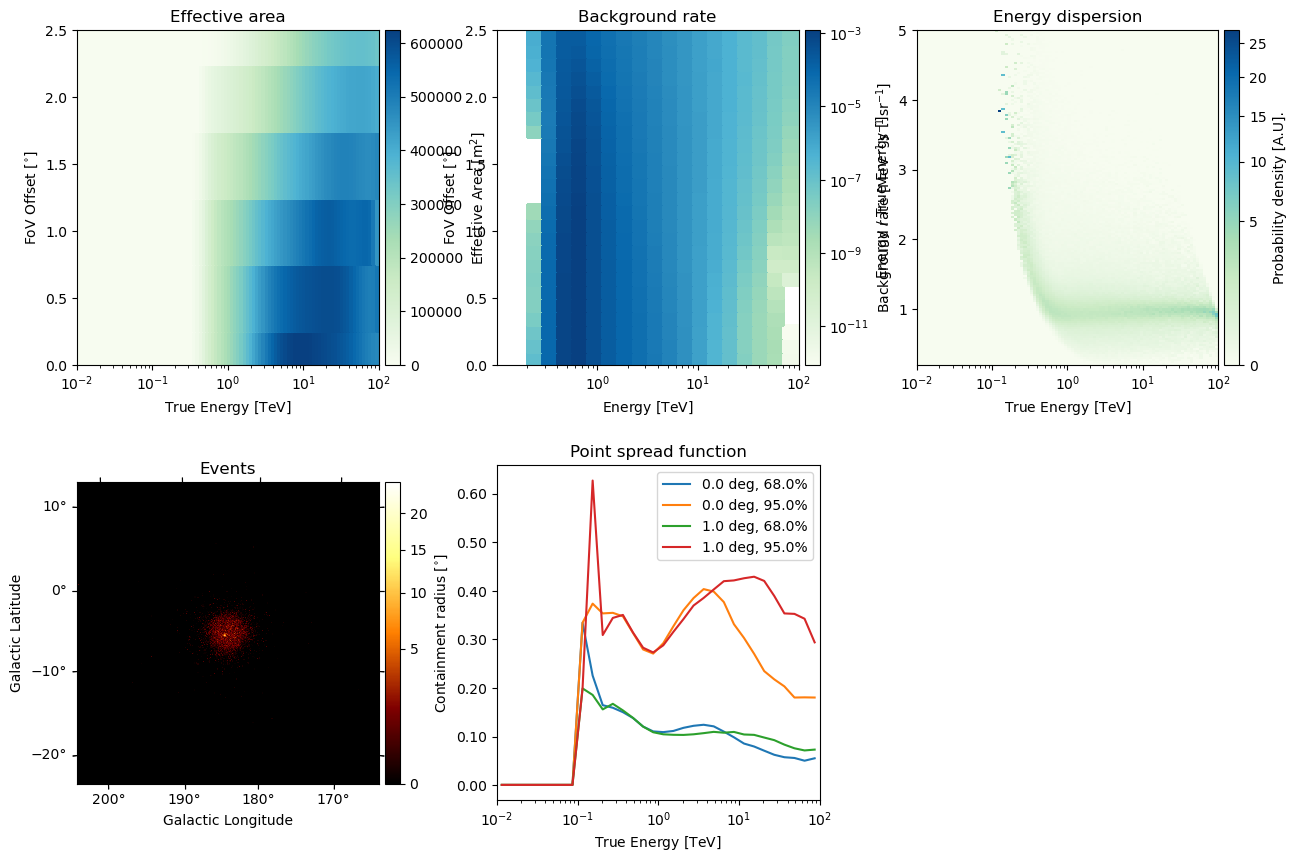

In [11]:
obs.peek()

### Events

Gamma-ray like events (i.e. at DL3) are stored in an `EventList` which contains an `astropy.table.Table`

In [12]:
print(obs.events)

EventList
---------

  Instrument       : H.E.S.S. Phase I
  Telescope        : HESS
  Obs. ID          : 23526

  Number of events : 7581
  Event rate       : 4.504 1 / s

  Time start       : 53343.95421509259
  Time stop        : 53343.97369425926

  Min. energy      : 2.88e-01 TeV
  Max. energy      : 8.49e+01 TeV
  Median energy    : 8.36e-01 TeV

  Max. offset      : 19.8 deg



/Users/mregeard/anaconda3/envs/okkie/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2553: RuntimeWarning: invalid value encountered in do_format (vectorized)
  outputs = ufunc(*inputs)
/Users/mregeard/anaconda3/envs/okkie/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2553: RuntimeWarning: invalid value encountered in do_format (vectorized)
  outputs = ufunc(*inputs)
/Users/mregeard/anaconda3/envs/okkie/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2553: RuntimeWarning: invalid value encountered in do_format (vectorized)
  outputs = ufunc(*inputs)
/Users/mregeard/anaconda3/envs/okkie/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2553: RuntimeWarning: invalid value encountered in do_format (vectorized)
  outputs = ufunc(*inputs)


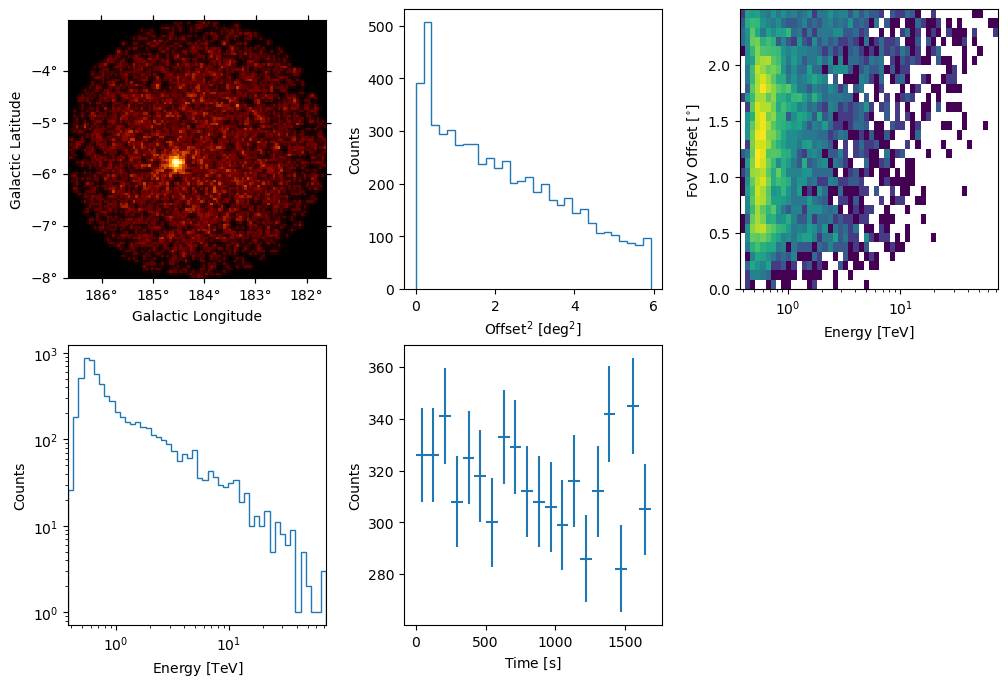

In [13]:
obs.events.select_offset([0,2.5]*u.deg).peek()

**Exercice**: how many events are there in ObsID 23523 within a circular ON region of 0.2 deg from the Crab?

*Hint : Look for a region selection tool in the API documentation of EventList.*

**Advanced exercice**: measure OFF counts in a symetrical region w.r.t. pointing direction. Compute the excess counts in the ON and the associated Li and Ma significance.

*Hints: Compute the offset and position angle of the ON region w.r.t. `EventList.pointing_radec` and use `SkyCoord.directional_offset_by` to find the OFF region.
Then use CountsStatistics as in https://docs.gammapy.org/1.2/user-guide/stats/index.html#wstat-counts-statistic*

In [14]:
from regions import CircleSkyRegion
region = CircleSkyRegion(center=position, radius=0.2*u.deg)
events_ON = obs.events.select_region(region)

N_ON = len(events_ON.table)
print(f"Number of ON events = {N_ON}")

Number of ON events = 350


In [15]:
pnt_icrs = obs.pointing.get_icrs(obstime=obs.tmid)
separation = pnt_icrs.separation(position)
position_angle = pnt_icrs.position_angle(position).to("deg")
print(position_angle)
wobble_position = pnt_icrs.directional_offset_by(position_angle=180*u.deg-position_angle, separation=separation)
print(wobble_position)
wobble_region = CircleSkyRegion(center=wobble_position, radius=0.2*u.deg)

events_OFF = obs.events.select_region(wobble_region)

N_OFF = len(events_OFF.table)
print(f"Number of OFF events = {N_OFF}")

180d21m03.64757954s
<SkyCoord (ICRS): (ra, dec) in deg
    (83.62997558, 23.01888882)>
Number of OFF events = 52


In [16]:
from gammapy.stats import WStatCountsStatistic

alpha = 1

stat = WStatCountsStatistic(N_ON, N_OFF, alpha)

print(stat)

WStatCountsStatistic
  Total counts                    : 350.00 
  Total background counts         : 52.00
  Total excess counts             : 298.00
  Total significance              : 15.74
  p - value                       : 0.000
  Total number of bins            : 1
  Off counts                      : 52.00 
  alpha                           : 1.00 
  Predicted signal counts         : 0.00 



### IRFs : effective area

Let's now look at the IRFs stored in the observation object. 

The effective area IRF is a set of tabulated values at given coordinates in true 3D space 

In [17]:
print(obs.aeff)

EffectiveAreaTable2D
--------------------

  axes  : ['energy_true', 'offset']
  shape : (96, 6)
  ndim  : 2
  unit  : m2
  dtype : >f4



Let's have a view on the IRF.

/Users/mregeard/anaconda3/envs/okkie/lib/python3.11/site-packages/astropy/units/quantity.py:659: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


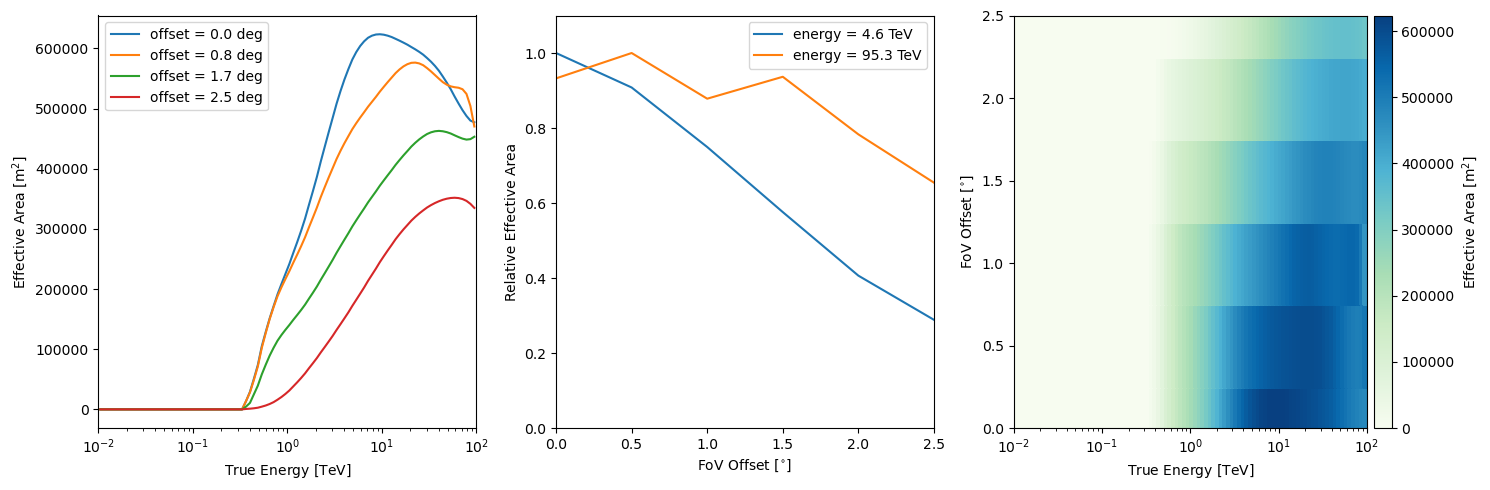

In [18]:
obs.aeff.peek()

The IRF also behaves like a function (it interpolates over the tabulated values).

In [19]:
obs.aeff.evaluate(energy_true=10*u.TeV, offset=1.2*u.deg)

<Quantity 467682.84572009 m2>

**Exercice**: plot the effective area offset dependence at 500 GeV, 1 and 10 TeV.

*Hint: look for the existing plot functions in the API.*

**Advanced exercice**: Re-implement the plotting yourself.

<Axes: xlabel='FoV Offset [$\\mathrm{{}^{\\circ}}$]', ylabel='Relative Effective Area'>

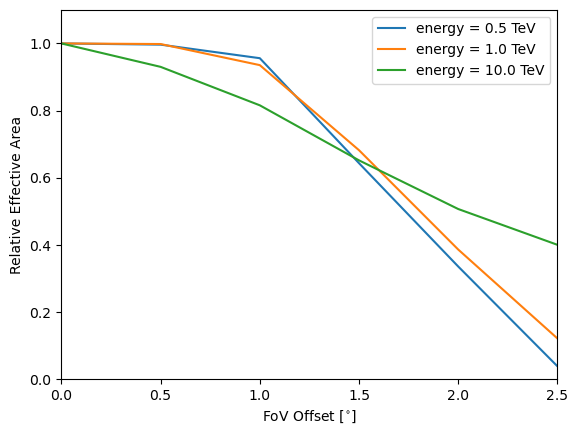

In [20]:
obs.aeff.plot_offset_dependence(energy=[0.5, 1., 10]*u.TeV)

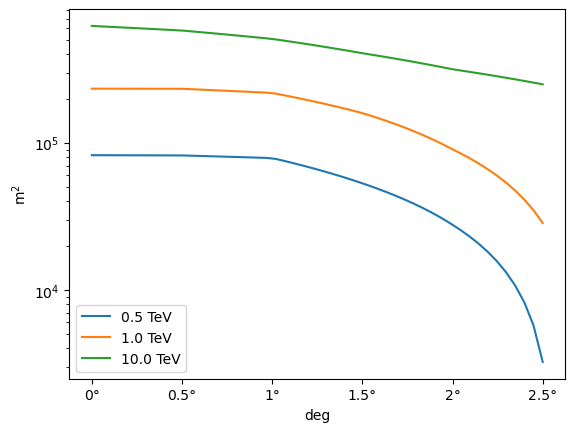

In [21]:
from astropy.visualization import quantity_support
offsets = np.linspace(0,2.5)*u.deg

for energy in [0.5, 1.0, 10.]*u.TeV:
    aeffs = obs.aeff.evaluate(energy_true=energy, offset=offsets)
    with quantity_support():
        plt.semilogy(offsets, aeffs, label=energy)
plt.legend()

### Evolution of the observation threshold during an observation night

Because a target is moving in the sky, its zenith angle will vary during the night. Because the energy threshold of a Cherenkov increase with the zenith angle, the latter will vary during the night.  

GADF effective area can contain an effective low energy threshold for the observation. On the HESS DL3 DR1 you can access it with:

In [22]:
obs.aeff.meta['LO_THRES']

0.707945784384138

**Exercice** : Extract observations of PKS 2155-304 taken on the night of July 29th to 30th 2006 in the HESS DL3 DR1 datastore. How does the observation threshold evolve as a function of observation time during the night? 

How does it compare to the zenith angle of the target as a function of time?

*Hint: IRCS coordinate is (329.717, -30.226). Use astropy.time.Time. Also note that `Observation.tmid` is a shortcut to the mid observation time of the `Observation`.*
*See also [astropy's doc on altitude of celestial objects](https://docs.astropy.org/en/latest/generated/examples/coordinates/plot_obs-planning.html#determining-and-plotting-the-altitude-azimuth-of-a-celestial-object)*

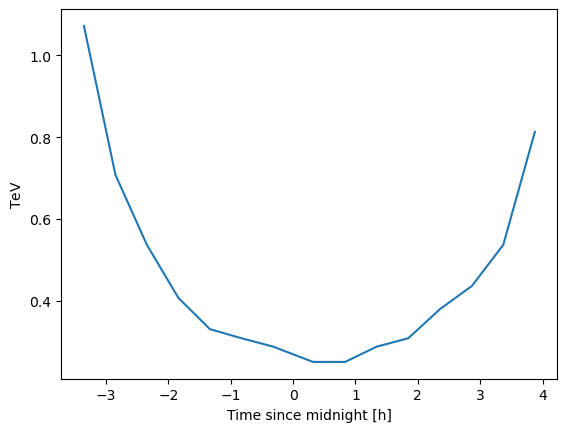

In [23]:
#Hint: IRCS coordinate is (329.717, -30.226). Use astropy.time.Time.SkyCoord.from_name("PKS 2155-304")
from astropy.time import Time

target = SkyCoord(329.717, -30.226, unit="deg", frame="icrs")
tstart = Time("2006-07-29T16:00")
tstop = Time("2006-07-30T10:00")

filtered = data_store.obs_table.select_sky_circle(target, 2.5*u.deg)
filtered = filtered.select_time_range([tstart, tstop])

pks_observations = data_store.get_observations(filtered["OBS_ID"])

thresholds = [obs.aeff.meta['LO_THRES'] for obs in pks_observations]*u.TeV    
times = Time([obs.tmid for obs in pks_observations])

# This is the time in the 
delta_times = times - Time("2006-07-30T00:00")
with quantity_support():
    plt.plot(delta_times.to("h"), thresholds)
    plt.xlabel("Time since midnight [h]")

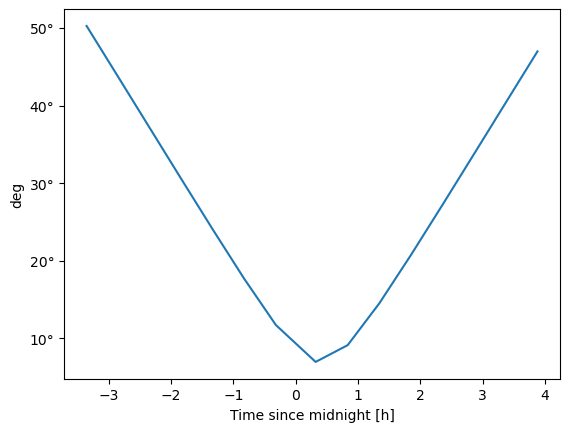

In [24]:
from astropy.coordinates import AltAz

zenith_angle = np.zeros(len(pks_observations))*u.deg
for i, obs in enumerate(pks_observations):
    altaz_frame = AltAz(location=obs.meta.location, obstime=obs.tmid)
    zenith_angle[i] = 90*u.deg - target.transform_to(altaz_frame).alt

with quantity_support():
    plt.plot(delta_times.to("h"), zenith_angle)
    plt.xlabel("Time since midnight [h]")

### EDISP

Provides the energy resolution as a function of position and true energy. It gives the probability to measure a given energy for a given true energy. It is stored as a function of migra = energy/energy_true

In [25]:
print(obs.edisp)

EnergyDispersion2D
------------------

  axes  : ['energy_true', 'migra', 'offset']
  shape : (96, 160, 6)
  ndim  : 3
  unit  : 
  dtype : >f4



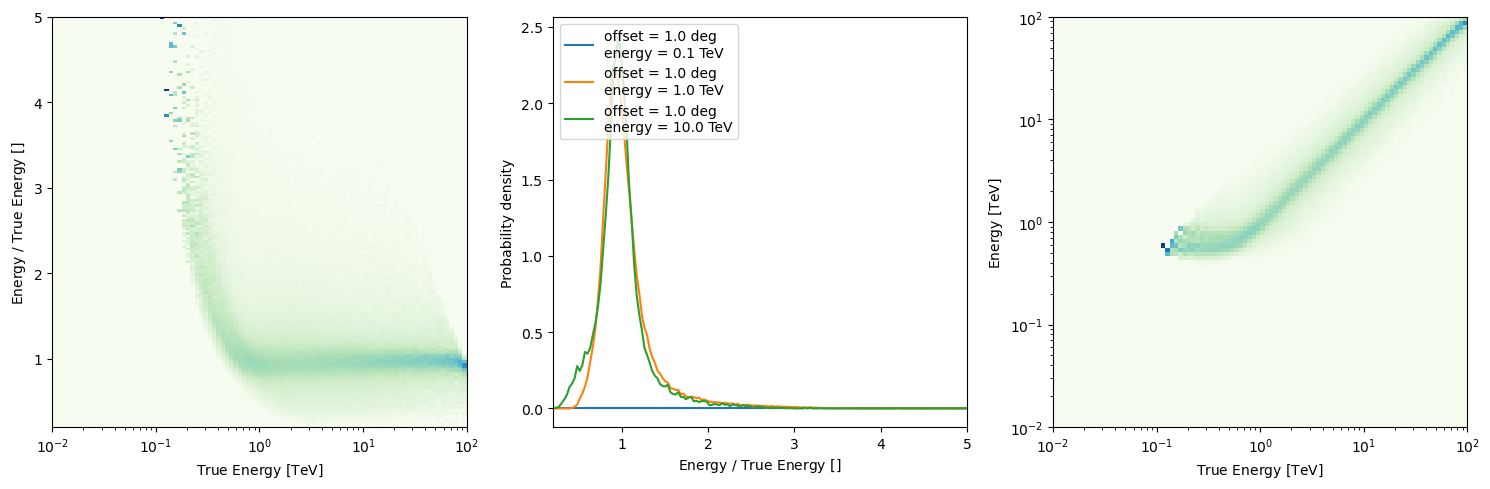

In [26]:
obs.edisp.peek()

For a given set of measurement, we use the `EDispKernel` with gives probability to measure a given energy for a given true energy.

In [27]:
kernel = obs.edisp.to_edisp_kernel(offset=0.5*u.deg)

<Axes: xlabel='True Energy [$\\mathrm{TeV}$]', ylabel='Energy [$\\mathrm{TeV}$]'>

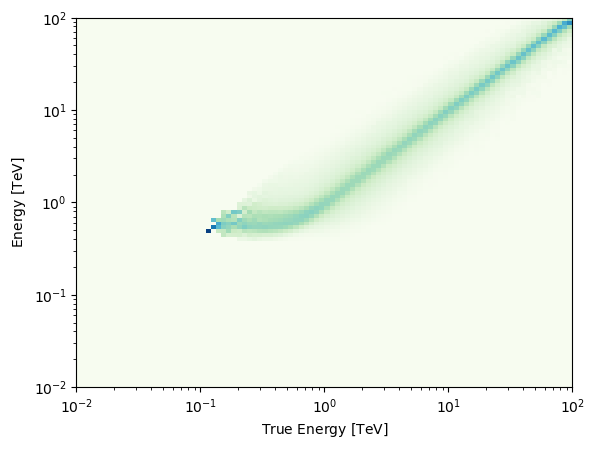

In [28]:
kernel.plot_matrix()

### PSF

It gives the probability to observe a photon as given distance from its true direction (the `rad` quantity) as a function of true energy and sourc eposition in the FoV.

In [29]:
print(obs.psf)

PSF3D
-----

  axes  : ['energy_true', 'offset', 'rad']
  shape : (32, 6, 144)
  ndim  : 3
  unit  : 1 / sr
  dtype : >f4



One can compute containment radius as a measurement of the breadth of the PSF

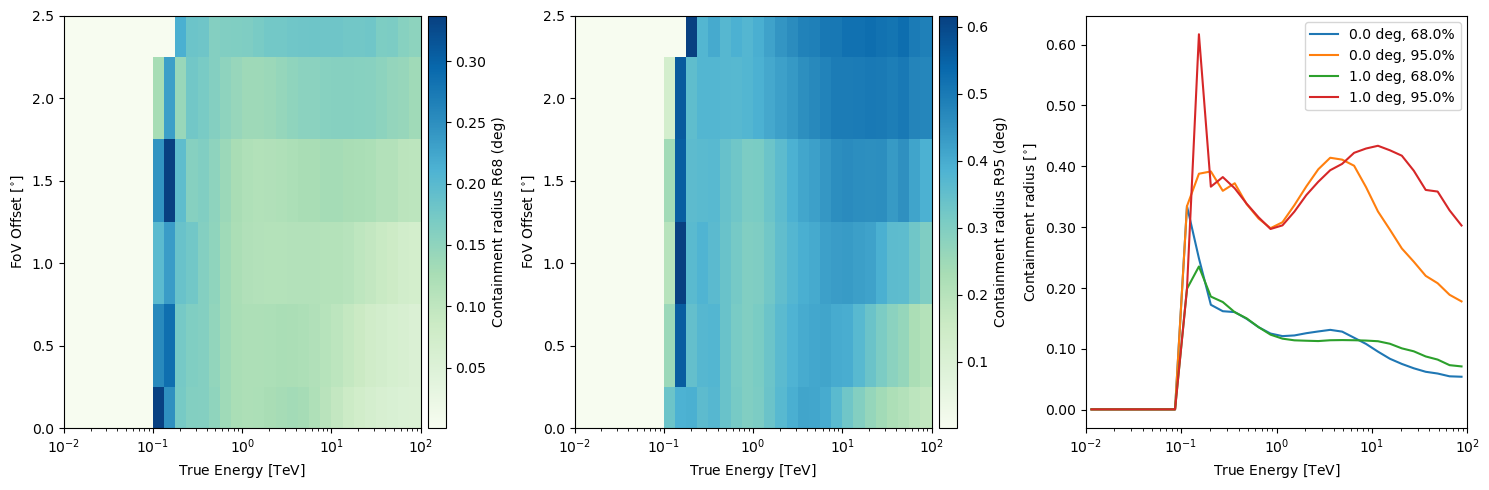

In [30]:
obs.psf.peek()

PSF is a probability. The PSF radius typically decreases with energy.

<Axes: xlabel='Source Offset [$\\mathrm{{}^{\\circ}}$]', ylabel='PSF [$\\mathrm{sr^{-1}}$]'>

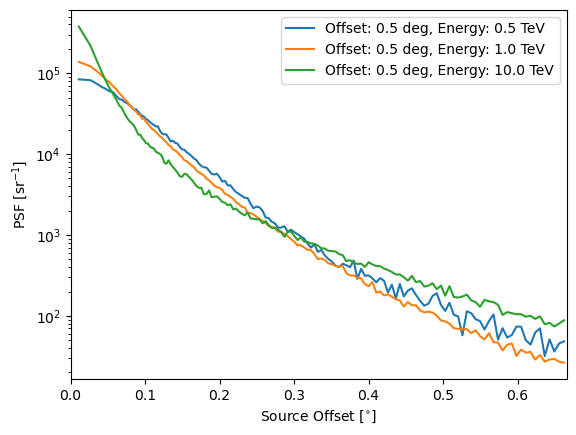

In [31]:
obs.psf.plot_psf_vs_rad(offset=[0.5]*u.deg, energy_true=[0.5, 1, 10]*u.TeV)

### BKG

In [32]:
print(obs.bkg)

Background3D
------------

  axes  : ['energy', 'fov_lon', 'fov_lat']
  shape : (20, 50, 50)
  ndim  : 3
  unit  : 1 / (MeV s sr)
  dtype : >f4



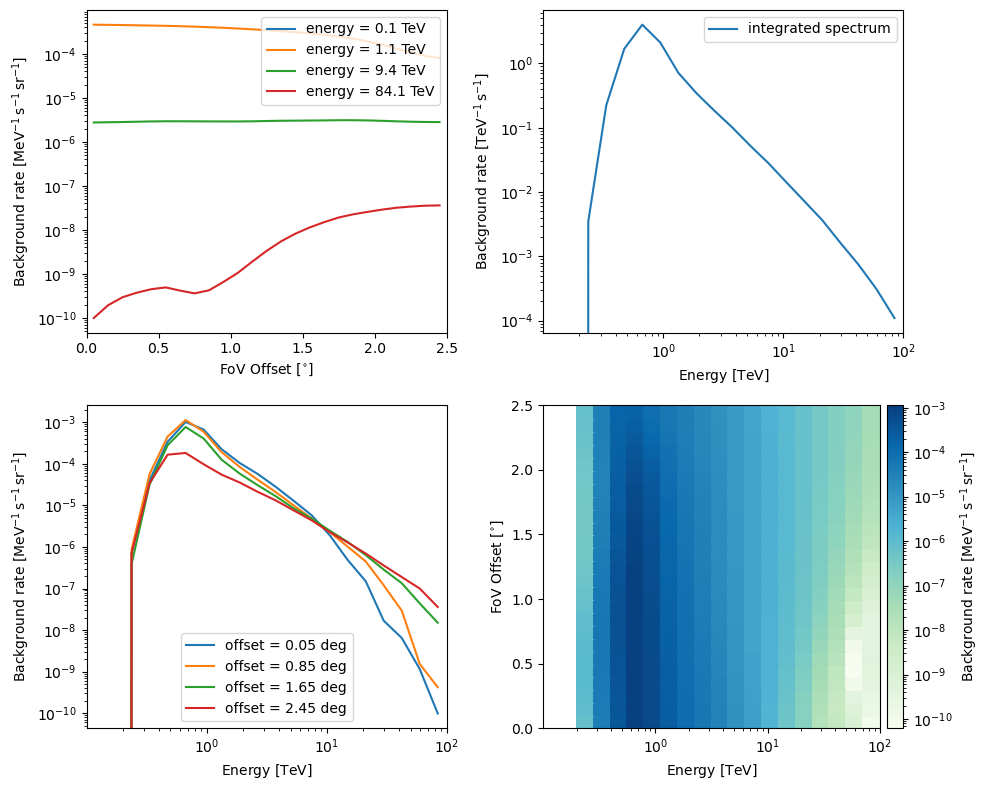

In [33]:
obs.bkg.peek()

### CTA IRFS

You can also load IRFs without the full `DataStore` with `load_irf_dict_from_file`

In [34]:
from gammapy.irf import load_irf_dict_from_file
irf_filename = (
        "$GAMMAPY_DATA/cta-caldb/Prod5-South-20deg-AverageAz-14MSTs37SSTs.180000s-v0.1.fits.gz"
)
irfs = load_irf_dict_from_file(irf_filename)
print(irfs)

{'aeff': <gammapy.irf.effective_area.EffectiveAreaTable2D object at 0x171333f10>, 'psf': <gammapy.irf.psf.parametric.EnergyDependentMultiGaussPSF object at 0x170b6dd90>, 'edisp': <gammapy.irf.edisp.core.EnergyDispersion2D object at 0x170be3350>, 'bkg': <gammapy.irf.background.Background3D object at 0x170beb490>}


#### AEFF

<Axes: xlabel='True Energy [$\\mathrm{TeV}$]', ylabel='FoV Offset [$\\mathrm{{}^{\\circ}}$]'>

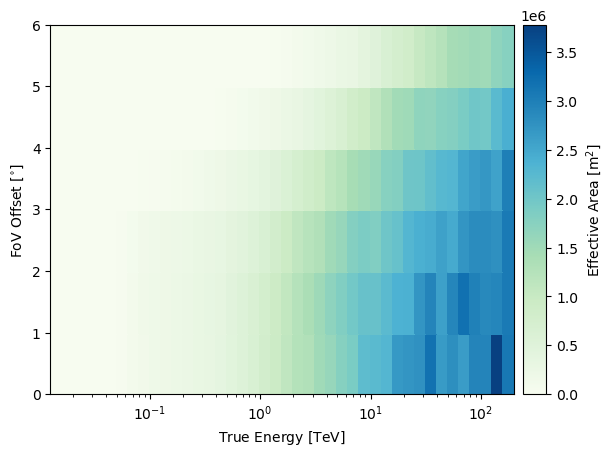

In [35]:
irfs['aeff'].plot()

#### PSF

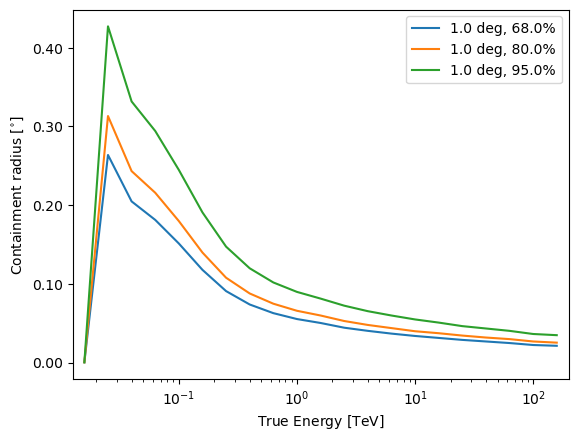

In [36]:
irfs["psf"].plot_containment_radius_vs_energy(
    offset=[1] * u.deg, fraction=[0.68, 0.8, 0.95]
)
plt.show()

#### BKG

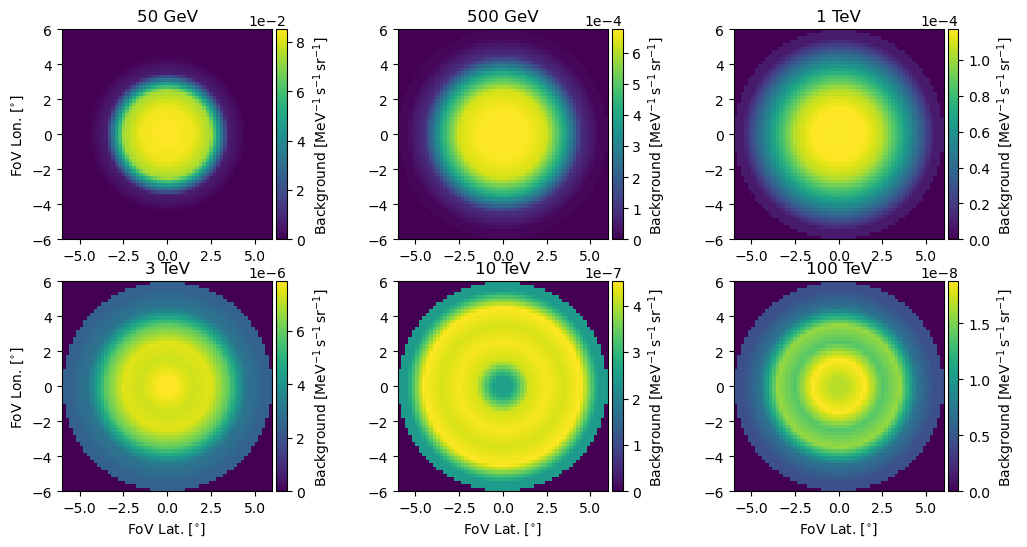

In [37]:
irfs["bkg"].plot_at_energy(
    ["50 GeV", "500 GeV", "1 TeV", "3 TeV", "10 TeV", "100 TeV"]
)
plt.show()

**Exercice**: compare IRFs of CTAO North and South sites. Make a combined plot of effective area at a given offset for each array.

*Hint: you can find the North site IRF here: $GAMMAPY_DATA/cta-caldb/Prod5-North-20deg-AverageAz-4LSTs09MSTs.180000s-v0.1.fits.gz*

In [38]:
irf_filename = (
        "$GAMMAPY_DATA/cta-caldb/Prod5-North-20deg-AverageAz-4LSTs09MSTs.180000s-v0.1.fits.gz"
)
irfs_north = load_irf_dict_from_file(irf_filename)

In [39]:
aeff_north = irfs_north["aeff"]
aeff_south = irfs["aeff"]


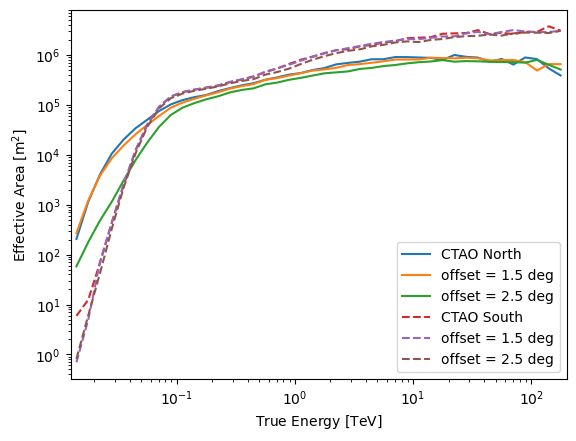

In [40]:
ax = aeff_north.plot_energy_dependence(offset=[0.5, 1.5, 2.5]*u.deg, label="CTAO North")
with plt.rc_context(rc={"lines.linestyle":'--'}):
    ax = aeff_south.plot_energy_dependence(offset=[0.5, 1.5, 2.5]*u.deg, label="CTAO South")
ax.set_yscale('log')
plt.legend()

Let's create an observation with CTAO South IRF.

In [41]:
from gammapy.data import Observation
from gammapy.data import observatory_locations

# define a fixed pointing in ICRS
source_pos = SkyCoord.from_name("Crab")
pointing = FixedPointingInfo(fixed_icrs=source_pos)

# define a livetime 
livetime=40*u.min

# take the location
#print(observatory_locations.keys())
location = observatory_locations["cta_south"]
obs = Observation.create(pointing, livetime=livetime, location=location, irfs=irfs)

In [42]:
print(obs)

Observation

	obs id            : 0 
 	tstart            : 51544.00
	tstop             : 51544.03
	duration          : 2400.00 s
	pointing (icrs)   : 83.6 deg, 22.0 deg

	deadtime fraction : 0.0%

